## Reading your First Volume
The HTRC Feature Reader library has two main objects for interacting with the extracted features dataset: **FeatureReader** and a **Volume**.  You will be using these within Python to access and query data.

The **FeatureReader** object is the interface for loading the dataset files and making sense of them. The files are originally formatted in a notation called JSON and compressed, which FeatureReader reads/parses of and returns as Volume objects. A **Volume** is a representation of a single book or other work. This is where you access features about a work.  Books are delivered to you as big JSON files that are stored in this repository.  The `FeatureReader` object contains the tools for extracting data from those files and loading it into your Python session.


There are many brief introduction to Jupyter videos on YouTube, and this page (https://jupyter-notebook.readthedocs.io/en/stable/notebook.html) of the Jupyter Documentation has thorough discussion of starting notebooks and what can be contained. We will highlight just a few of these features of the tool.

Let's load two volumes to understand how the FeatureReader works. There are two cells to run. The first will import the `FeatureReader` toolkit and the other will import the `os` module from the Python standard library.  Then the second will load out data and print the titles off for the two books.

Run the following cells, by selecting the first and press the 'play' button at the top or press `Ctrl+Enter` while the code cell is active.  We will demonstrate both of these during the workshop.  This should give you the output shown below.  Repeat this to run the second cell.



In [1]:
from htrc_features import FeatureReader
import os

In [3]:
paths = ['data/sample-file1.json.bz2', 'data/sample-file2.json.bz2'] # our two files
fr = FeatureReader(paths)                                            # passing these paths to the FeatureReader to open and load
for vol in fr.volumes():                                             # now we can iterate over them
    print("Title: " + vol.title)                                     # printing off the title

Title: June / by Edith Barnard Delano ; with illustrations.
Title: You never know your luck; being the story of a matrimonial deserter, by Gilbert Parker ... illustrated by W.L. Jacobs.


In [4]:
paths = ['data/mdp.39015003763490.json.bz2', 'data/mdp.39015005607976.json.bz2'] # our two files
fr = FeatureReader(paths)                                            # passing these paths to the FeatureReader to open and load
for vol in fr.volumes():                                             # now we can iterate over them
    print("Title: " + vol.title, vol.enumeration_chronology)         # printing off the title
    
    

Title: The lord of the rings, by J. R. R. Tolkien. pt.2
Title: The lord of the rings, by J. R. R. Tolkien. pt.3


Here, the FeatureReader is imported and initialized with file paths pointing to two Extracted Features files from the `data` subfolder: `data/sample-file1.json` and `data/sample-file2.json`.

With `fr = FeatureReader(paths)`, the FeatureReader is initialized, meaning it is ready to use. An initialized FeatureReader is holding references to the file paths that we gave it, and will load them into Volume objects when asked.

Consider the last bit of code:

```python
for vol in fr.volumes():
    print("Title: " + vol.title)
```

This code asks for volumes in a way that can be iterated through. The `for` loop is saying to `fr.volumes()`, "give me every single volume that you have, one by one." Each time the `for` loop gets a volume, it starts calling it `vol`, runs what is inside the loop on it, then asks for the next one. In this case, we just told it to print the title of the volume with the word Title in front of it, so you can see where the individual titles begin.

### Exercises

What are the names of the books in the following files `data/mdp.39015003763490.json.bz2` and `data/mdp.39015005607976.json.bz2`?

1. Add a new code cell below by selecting this cell and pressing the `b` key or the `+` icon at the top of the notebook.  To make the 'b' keyboard shortcut work, you have to have selected the cell but not be editing it.  For the `+` icon, be wary that it is very near the 'cut' button.
    
2. Copy the code from the cell where you are printing out the title.

3. Paste that code into the new cell below this one (this makes it easier to see along with the directions, the location doesn't fully matter to the code)

4. Do the results look a little odd?  You can adjust the code in the print statement to tell you more abour the volumes.  Hint: use `vol.enumeration_chronology` to see which part of a set the book is.

_Once you have the answer, look around, and help anybody you see that is still figuring it out._

## What's in a Volume?

Let's take a closer look at what features are accessible for a Volume object. For clarity, we'll grab the first Volume to focus on, which can conveniently be accessed with the `first()` method. Any code you write can easily be run later with a `for vol in fr.volumes()` loop.

Again here, start a new code cell in the same notebook that you had open before and run the following code. The FeatureReader does not need to be loaded again: it is still initialized and accessible as `fr` from earlier.

In [8]:
# Reading a single volume
vol = fr.first()
vol

While the majority of the HTRC Extracted Features dataset is *features*, quantitative abstractions of a book's written content, there is also a small amount of metadata included for each volume. Objects in Python usually have values that can be accessed as well as methods.  You can tell the difference between these by noting that some of them lack ot the end `()` and others do end with `()`.  You will need to depend on the documentation for whatever tool you are using to know how things should be accessed.  This is because the designers of that tool made the choices for what their names are and how they should be accessed. As you gain more experience, you will develop a better sense for how any why. But even experienced programmers depend on the documentation to know these things!  

This metadata is accessed from an object.  We do this via 'calling a method on' or 'accessing an attribute of'.  Methods end in `()` and attributes don't.  All this means is that when we have something like `vol`, representing a single `Volume` object, we can call methods or access attributes by placing a `.` after the variable name and then putting the name of the thing we want. You've seen this in a few places already, this is just the name for that activity!

We already saw `vol.title` accessed earlier. Other metadata attributes include:

- `vol.id`: A unique identifier for the volume in the HathiTrust and the HathiTrust Research Center.
- `vol.year`: The publishing date of the volume.
- `vol.language`: The classified language of the volume.
- `vol.oclc`: The OCLC control number(s).

The scanned copy of the book can be found from the HathiTrust Digital Library, when available, at the url returned by `vol.handle_url`:

In [11]:
vol.handle_url

'http://hdl.handle.net/2027/nyp.33433074811310'

The book at that link looks like this:

<img src="images/June-cover.PNG" width="250px" alt="Digital copy of sample book"  />

Hopefully by now you are growing more comfortable with the process of running code in a Jupyter notebook, starting a cell, writing code, and running the cell. A valuable property of this type of interactive coding and execution is that there is room for error. An error doesn't cause the whole program to crash, requiring you to rerun everything from the start. Instead, just fix the code in your cell and try again.

In Jupyter, pressing the 'TAB' key will guess at what you want to type next. Typing `vo` then TAB will fill in `vol`, typing `Fea` then TAB will fill in `FeatureReader`. Note that case should matter here.

Auto-completion with the tab key also provides more information about what you can get from an object. Try typing `vol.` (with the period) in a new cell, then press TAB. Jupyter shows everything that you can access for that Volume.

<img src="images/autocomplete.png" width="350px" alt="Tab Autocomplete in Jupyter">

The Extracted Features dataset does not hold all the metadata that the HathiTrust has for the book. More in-depth metadata like genre and subject class needs to be grabbed from other sources, such as the [HathiTrust Bibliographic API](https://www.hathitrust.org/bib_api). The URL to access this information can be retrieved with `vol.ht_bib_url`.  We won't be covering how to grab this metadata, but it is there if your research takes you in this direction.

## Exercise

1. There is an attribute of a volume that tells you how many pages a book has. It starts with a `p`, but we won't give you the whole thing - try TAB auto-completion on `vol.p` to find it!

2. What information is returned by the attribute `vol.ht_bib_url`?

3. `vol.line_chars()` is a method gives you a count of characters at the beginning and end of lines on a page. Try running in.
    - How does running a 'method' differ from an attribute like in the earlier questions?
    - What happens if you run this method as if it was an attribute?
    - Why do you think there is a distinction between attributes and methods?
    
4. We sneakily introduced a convenience above, when showing you the `vol_handle_url` - Jupyter automatically printed it without us telling it to `print()` as before. Can you guess - through tinkering - when Jupyter automatically prints? Try, for example, the following code block for a hint:

In [ ]:
vol.handle_url
vol.title
vol.year

_When your done the exercises, help people around you._

## Our First Feature Access: Visualizing Words Per Page

It's time to access the first features of `vol`: a table of total words for every single page. These can be accessed by calling `vol.tokens_per_page()`. In language processing lingo, we usally refer to the words and other things within a text as tokens. This is a broader more inclusive term because there can be things other than purely words parsed into tokens. This is similar to referring to a 'book' as a volume, so that we understand there are many ways of being a book.  

Try the following code.

> If you are using a Jupyter notebook, returning this table at the end of a cell formats it nicely in the browser. Below, you'll see us append `.head()` to the `tokens` table, which allows us to look at just the top few rows: the 'head' of the data. 

In [28]:
tokens = vol.tokens_per_page()
# Show just the first few rows, so we can look at what it looks like
tokens.head()

,count
page,
1,0
2,6
3,0
4,0
5,0


This is a regular table of data with two columns, similar to what you would see in Excel or Google Spreadsheets. Each row in the table has a page number and the count of words on each page. With only two dimensions, it is trivial to plot the number of words per page. The table structure holding the data has a `plot` method for data graphics. Without extra arguments (meaning there's nothing in the `()`), `tokens.plot()` will assume that you want a line chart with the page on the x-axis and word count on the y-axis.

In order to use the plotting functionality within pandas, we will need to use a Jupyter magic to tell the notebook that we want the images displayed in the notebook under the cell.  Jupyter has many of these commands to control various aspects of notebook activity.  They all begin with `%` and will only work within a notebook.

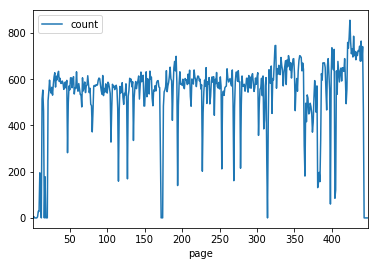

In [32]:
%matplotlib inline 
tokens.plot()              # here we are asking for the plot

> `%matplotlib inline` tells Jupyter to show the plotted image directly in the notebook web page. It only needs to be called once, and isn't needed if you're not using notebooks.

On some systems, this may take some time the first time. 

This is a line chart where the x axis is the page number, and the y axis is the value of `count`, representing the number of words on that page.  The default settings for this plot don't make it the prettiest, but it is certainly easy for getting little looks into your data.  Looking at the beginning of the chart (near the origin for the x axis), you should be able to see that the pages at the start of a book have fewer words per page, after which the count is fairly steady except for occasional valleys.

You may have some guesses for what these patterns mean. A look at the [scans](http://hdl.handle.net/2027/nyp.33433074811310) confirms that the large valleys are often illustration pages or blank pages, small valleys are chapter headings, and the upward pattern at the start is from front matter. 

Not all books will have the same patterns so we can't just codify these correlations for millions of books. However, looking at this plot makes clear an inportant assumption in text and data mining: that there are patterns underlying even the basic statistics derived from a text. The trick is to identify the consistent and interesting patterns and teach them to a computer.

You need to leverage your qualitative understanding of the book physical structure of where the words appear and your knowledge of the content.  Think through how your qualitative understanding of the content might be represented in a quantitative method.  For example, how might a book of poems look when charted? Would they look very different from other books of poems?

### A pandas interlude: Understanding DataFrames

Wait... how did we get here so quickly!? We went from a volume to a data visualization in two lines of code. The magic is in the data structure used to hold our table of data: a DataFrame.

A **DataFrame** is a type of object provided by the data analysis library, Pandas. **Pandas** is very common for data analysis, allowing conveniences in Python that are found in statistical languages like R or Matlab.  Our features tool that we are using in this tutorial hooks into this dataframe structure to try and provide industry standard ways of interacting with the data.  This means that you the tool is delivering the data into a framework with strong support and help.  Once the data exists in a pandas data frame, you can use pure pandas to process it or export it for another system.

In the first line, `vol.tokens_per_page()` returns a DataFrame, something that can be confirmed if you ask Python about its type with `type(tokens)`. This means that _after setting `tokens`, we're no longer working with HTRC-specific code, just book data held in a common and very robust table-like construct from Pandas_. `tokens.head()` used a DataFrame method to look at the first few rows of the dataset, and `tokens.plot()` uses a method from Pandas to visualize data.

Many of the methods in the HTRC Feature Reader return DataFrames.  Return is a special word for when a function or method 'passes back' something that you can save. You have seen this when we call a method and save that result to a variable.  This means that  The aim is to fit into the workflow of an experienced user, rather than requiring them to learn proprietary new formats. For new Python data mining users, learning to use the HTRC Feature Reader means learning many data mining skills that will translate to other uses.

## Exercises

1. What happens if instead of `tokens.plot()`, you ran `tokens.plot?` ? That is, replacing the parentheses with a question mark.

2. Will the above question mark trick work with any of the methods that we've seen (e.g. `tokens_per_page` or `line_chars`)?